In [1]:
import numpy as np
import fitsio as fio
from matplotlib import pyplot as plt
import matplotlib
import proplot as pplt
import glob
import os, sys
import h5py as h5
from des_y6utils import mdet
%matplotlib inline

In [2]:
# Get balrog outputs
fs = sorted(glob.glob('/global/cfs/cdirs/des/y6-balrog/balrog_cats_Y6/matched_measured_cat_Y6_NERSC_metadetect_0_999_*.fits'))
print(fs)

['/global/cfs/cdirs/des/y6-balrog/balrog_cats_Y6/matched_measured_cat_Y6_NERSC_metadetect_0_999_1m.fits', '/global/cfs/cdirs/des/y6-balrog/balrog_cats_Y6/matched_measured_cat_Y6_NERSC_metadetect_0_999_1p.fits', '/global/cfs/cdirs/des/y6-balrog/balrog_cats_Y6/matched_measured_cat_Y6_NERSC_metadetect_0_999_2m.fits', '/global/cfs/cdirs/des/y6-balrog/balrog_cats_Y6/matched_measured_cat_Y6_NERSC_metadetect_0_999_2p.fits', '/global/cfs/cdirs/des/y6-balrog/balrog_cats_Y6/matched_measured_cat_Y6_NERSC_metadetect_0_999_noshear.fits']


In [3]:
d_noshear = fio.read(fs[4])
mask_weight_ = (d_noshear['weight_scheme'] == 'Y3_weight')
d_noshear = d_noshear[mask_weight_]

d_1m = fio.read(fs[0])
mask_weight_ = (d_1m['weight_scheme'] == 'Y3_weight')
d_1m = d_1m[mask_weight_]

d_1p = fio.read(fs[1])
mask_weight_ = (d_1p['weight_scheme'] == 'Y3_weight')
d_1p = d_1p[mask_weight_]

d_2m = fio.read(fs[2])
mask_weight_ = (d_2m['weight_scheme'] == 'Y3_weight')
d_2m = d_2m[mask_weight_]

d_2p = fio.read(fs[3])
mask_weight_ = (d_2p['weight_scheme'] == 'Y3_weight')
d_2p = d_2p[mask_weight_]

print(len(d_noshear), d_noshear.dtype)

733003 [('id', '>i4'), ('flags', '>i4'), ('bdf_flags', '>i4'), ('ra', '>f8'), ('dec', '>f8'), ('psf_mag', '>f8', (4,)), ('bdf_T', '>f8'), ('bdf_T_err', '>f8'), ('bdf_s2n', '>f8'), ('bdf_flux', '>f8', (4,)), ('bdf_flux_err', '>f8', (4,)), ('mask_flags', '>i4'), ('bdf_mag', '>f8', (4,)), ('bdf_g', '>f8', (2,)), ('bdf_fracdev', '>f8'), ('bdf_flux_cov', '>f8', (16,)), ('bdf_pars', '>f8', (10,)), ('tilename', '<U20'), ('gap_flux', '>f8', (4,)), ('gap_flux_err', '>f8', (4,)), ('gap_mag', '>f8', (4,)), ('bdf_flux_deredden', '>f4', (4,)), ('bdf_mag_deredden', '>f4', (4,)), ('in_VHS_footprint', '>i4'), ('avgbdf', '>f8'), ('COSMOS2020', '>f8'), ('PAUS+COSMOS', '>f8'), ('specZ', '>f8'), ('highQz', '>f8'), ('Y3_weight', '>f8'), ('WL_weight', '>f8'), ('WL_weight_highQz', '>f8'), ('LSS_weight', '>f8'), ('LSS_weight_highQz', '>f8'), ('rotation', '>f8'), ('weight_scheme', '<U17'), ('meas_slice_id', '>i8'), ('meas_mdet_step', '<U7'), ('meas_ra', '>f8'), ('meas_dec', '>f8'), ('meas_ra_noshear', '>f8'), 

In [7]:
np.unique(d_noshear['weight_scheme'])

array(['Y3_weight'], dtype='<U17')

# List of tests

## 1. Spatial distributions

In [8]:
ra = d_noshear['ra']; dec = d_noshear['dec']
x = d_noshear['meas_x']; y = d_noshear['meas_y']

(-56.0, -55.0)

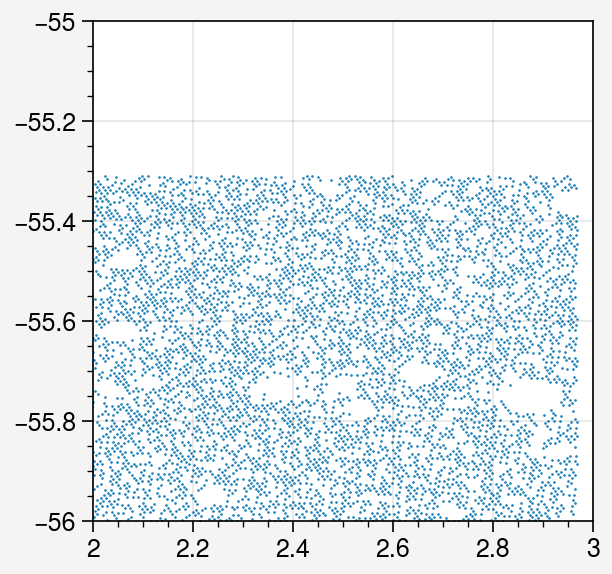

In [12]:
fig,ax=pplt.subplots()
ax.scatter(ra, dec, s=0.1)
ax.set_xlim(2,3)
ax.set_ylim(-56,-55)

## 2. data vs sim quantities (S/N, size ratio, size, magnitudes, color-color)

In [4]:
f = h5.File('/global/cfs/cdirs/des/y6-shear-catalogs/Y6A2_METADETECT_V5b/metadetect_desdmv5a_cutsv5_patchesv5b.h5', 'r')
d_y6 = f.get('/mdet/noshear')
ra_y6 = np.array(d_y6['ra']); dec_y6 = np.array(d_y6['dec'])
s2n_y6 = np.array(d_y6['gauss_s2n'])
# pgauss_s2n_y6 = np.array(d_y6['pgauss_s2n'])
sizer_y6 = np.array(d_y6['gauss_T_ratio'])
# pgauss_sizer_y6 = np.array(d_y6['pgauss_T_ratio'])
# size_y6 = np.array(d_y6['gauss_T'])
pgauss_size_y6 = np.array(d_y6['pgauss_T'])
flux_g = np.array(d_y6['pgauss_band_flux_g'])
flux_r = np.array(d_y6['pgauss_band_flux_r'])
flux_i = np.array(d_y6['pgauss_band_flux_i'])
flux_z = np.array(d_y6['pgauss_band_flux_z'])

mag_g = mdet._compute_asinh_mags(flux_g, 0)
mag_r = mdet._compute_asinh_mags(flux_r, 1)
mag_i = mdet._compute_asinh_mags(flux_i, 2)
mag_z = mdet._compute_asinh_mags(flux_z, 3)
gmr = mag_g - mag_r
gmi = mag_g - mag_i
rmi = mag_r - mag_i
imz = mag_i - mag_z

(0.0, 1.0)

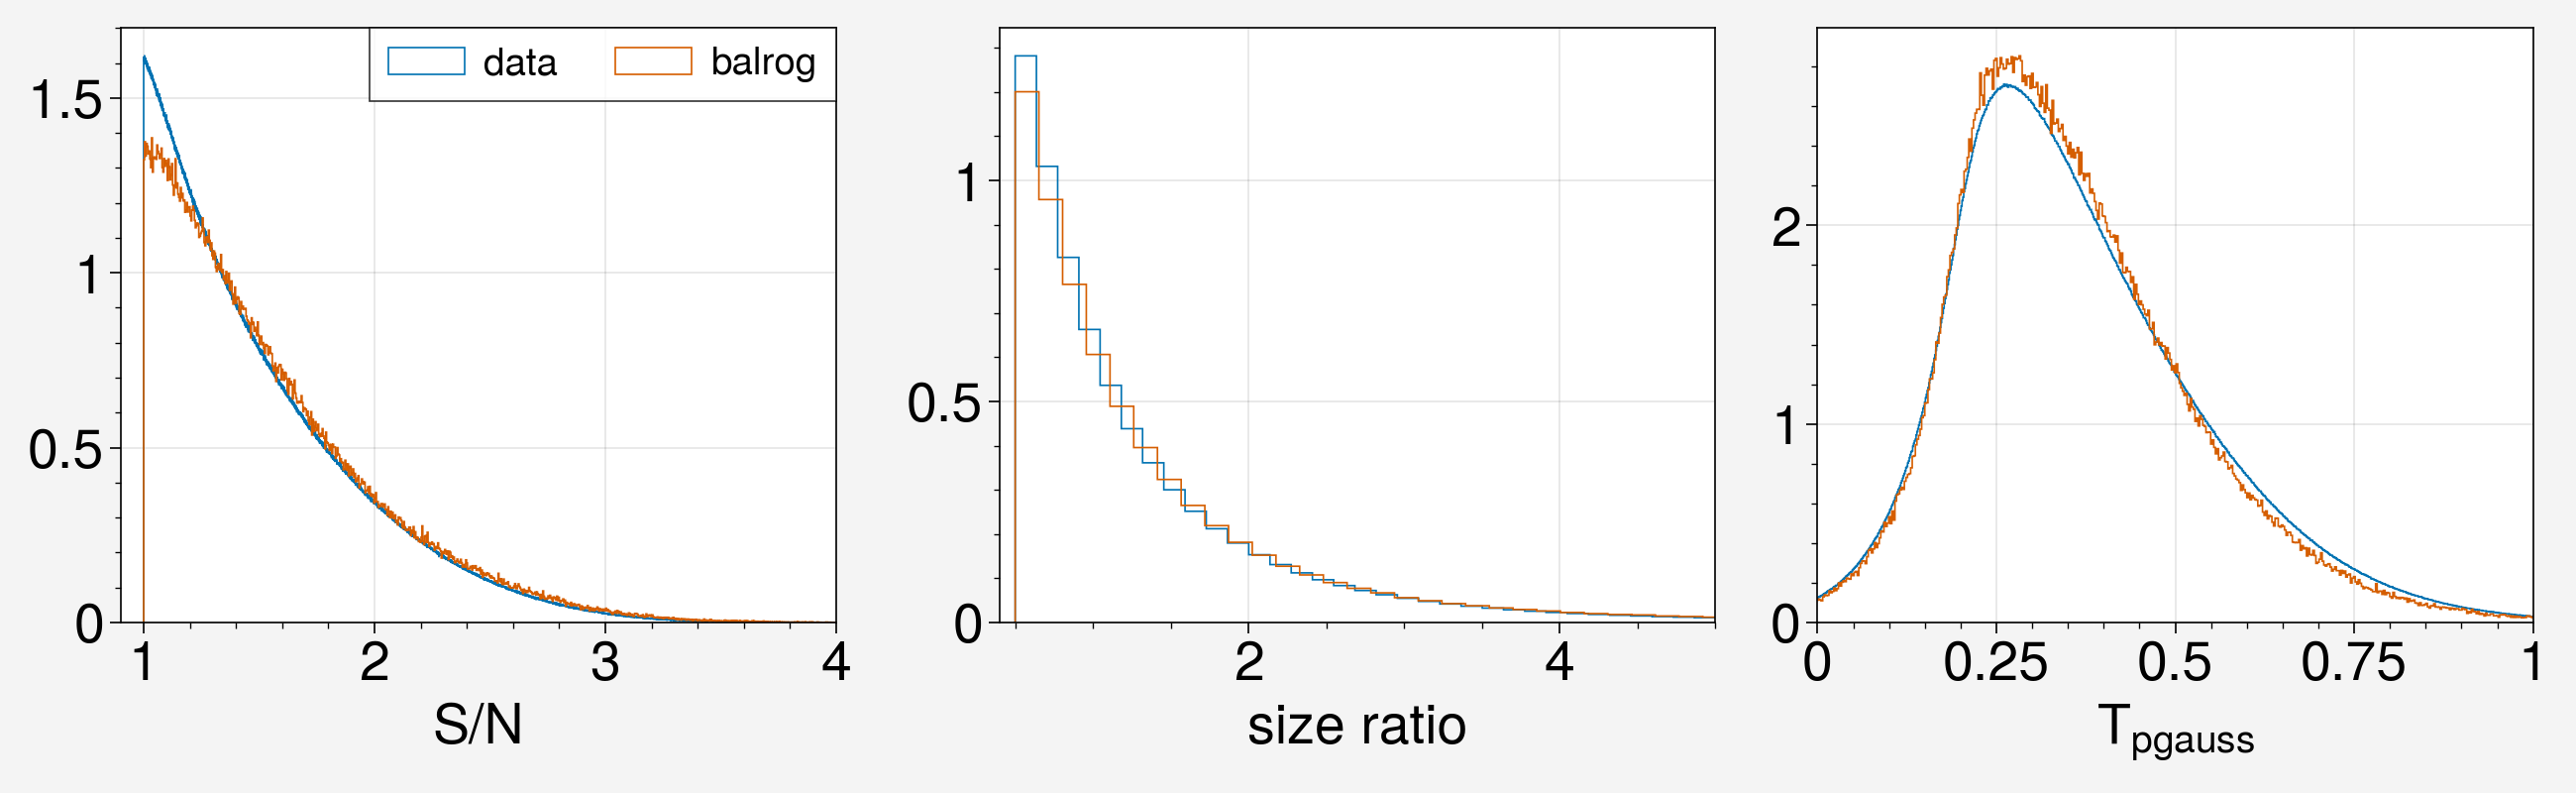

In [9]:
matplotlib.rcParams.update({'font.size': 20, 'legend.fontsize':'x-small'})
fig,ax=pplt.subplots(nrows=1, ncols=3, figsize=(13,4), sharex=False, sharey=False)
ax[0].hist(np.log10(s2n_y6), bins=10000, histtype='step', density=True, label='data')
ax[0].hist(np.log10(d_noshear['meas_gauss_s2n']), bins=1000, histtype='step', density=True, label='balrog')
ax[0].set_xlabel('S/N')
ax[0].set_xlim(0.9, 4)
ax[0].legend()

ax[1].hist(sizer_y6, bins=10000, density=True, histtype='step')
ax[1].hist(d_noshear['meas_gauss_T_ratio'], bins=1000, density=True, histtype='step')
ax[1].set_xlabel('size ratio')
ax[1].set_xlim(0.4, 5.0)

ax[2].hist(pgauss_size_y6, bins=10000, density=True,histtype='step')
ax[2].hist(d_noshear['meas_pgauss_T'], bins=1000, density=True, histtype='step')
ax[2].set_xlabel(r'$T_{\rm pgauss}$')
ax[2].set_xlim(0, 1)

Text(0.5, 0, '$m_{z}$')

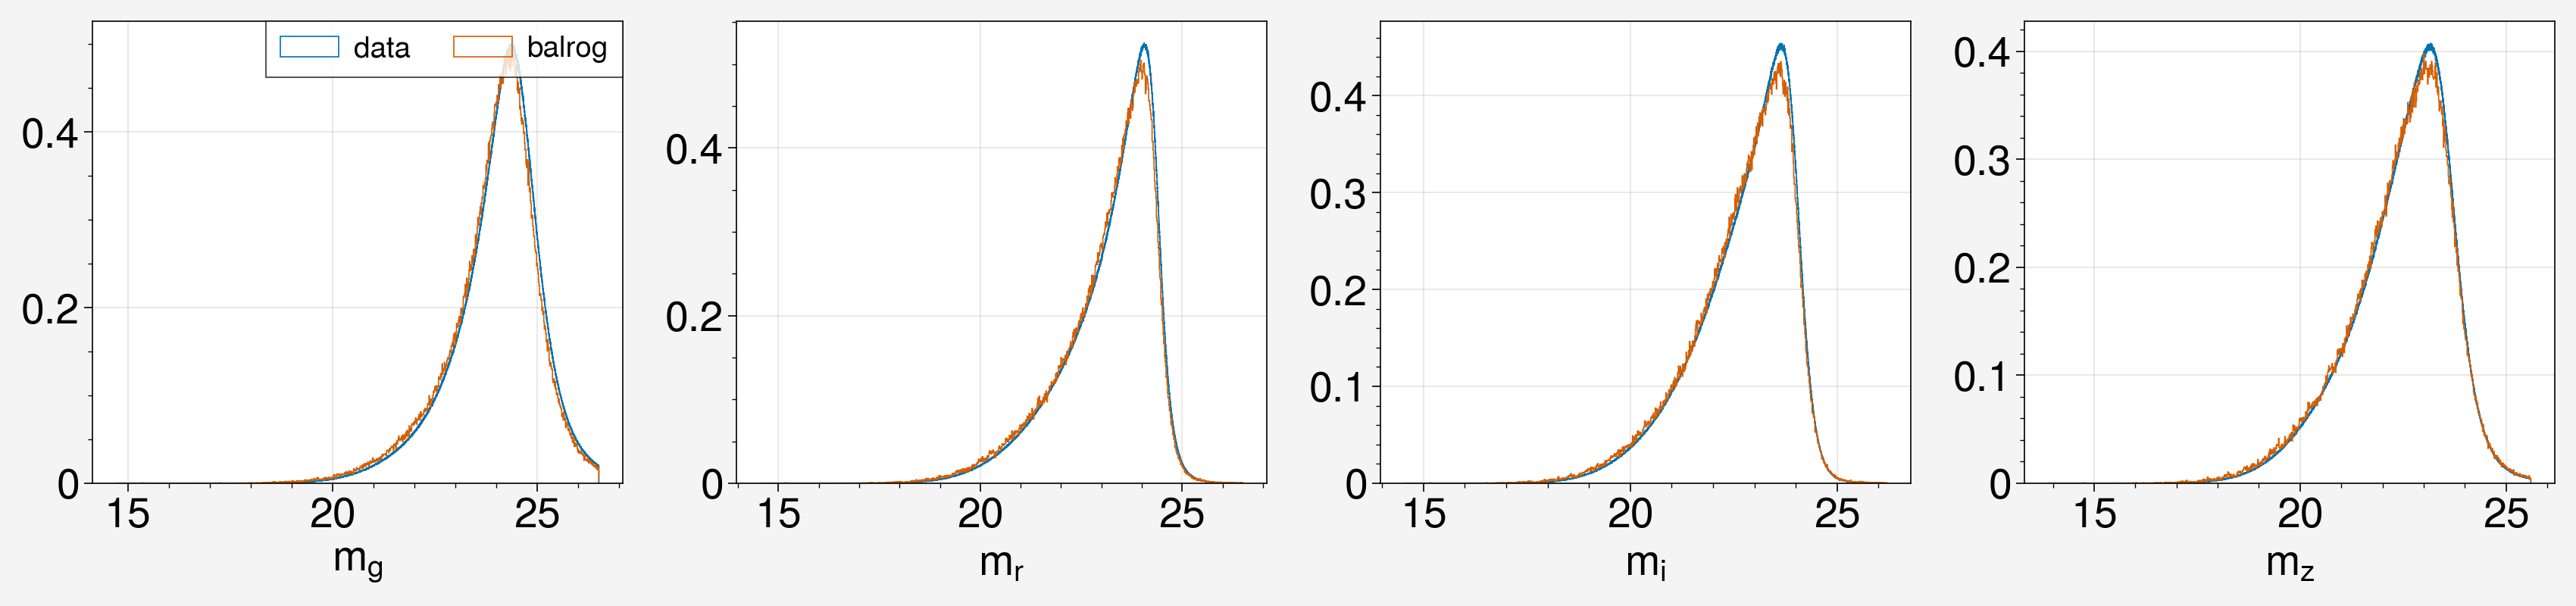

In [10]:
matplotlib.rcParams.update({'font.size': 20, 'legend.fontsize':'x-small'})
fig,ax=pplt.subplots(nrows=1, ncols=4, figsize=(17,4), sharex=False, sharey=False)
ax[0].hist(mag_g, bins=10000, histtype='step', density=True, label='data')
ax[0].hist(mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_g'], 0), bins=1000, histtype='step', density=True, label='balrog')
ax[0].set_xlabel('$m_{g}$')
ax[0].legend()

ax[1].hist(mag_r, bins=10000, histtype='step', density=True, label='data')
ax[1].hist(mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_r'], 1), bins=1000, histtype='step', density=True)
ax[1].set_xlabel('$m_{r}$')

ax[2].hist(mag_i, bins=10000, histtype='step', density=True, label='data')
ax[2].hist(mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_i'], 2), bins=1000, histtype='step', density=True)
ax[2].set_xlabel('$m_{i}$')

ax[3].hist(mag_z, bins=10000, histtype='step', density=True, label='data')
ax[3].hist(mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_z'], 3), bins=1000, histtype='step', density=True)
ax[3].set_xlabel('$m_{z}$')

Text(0.5, 0, '$i-z$')

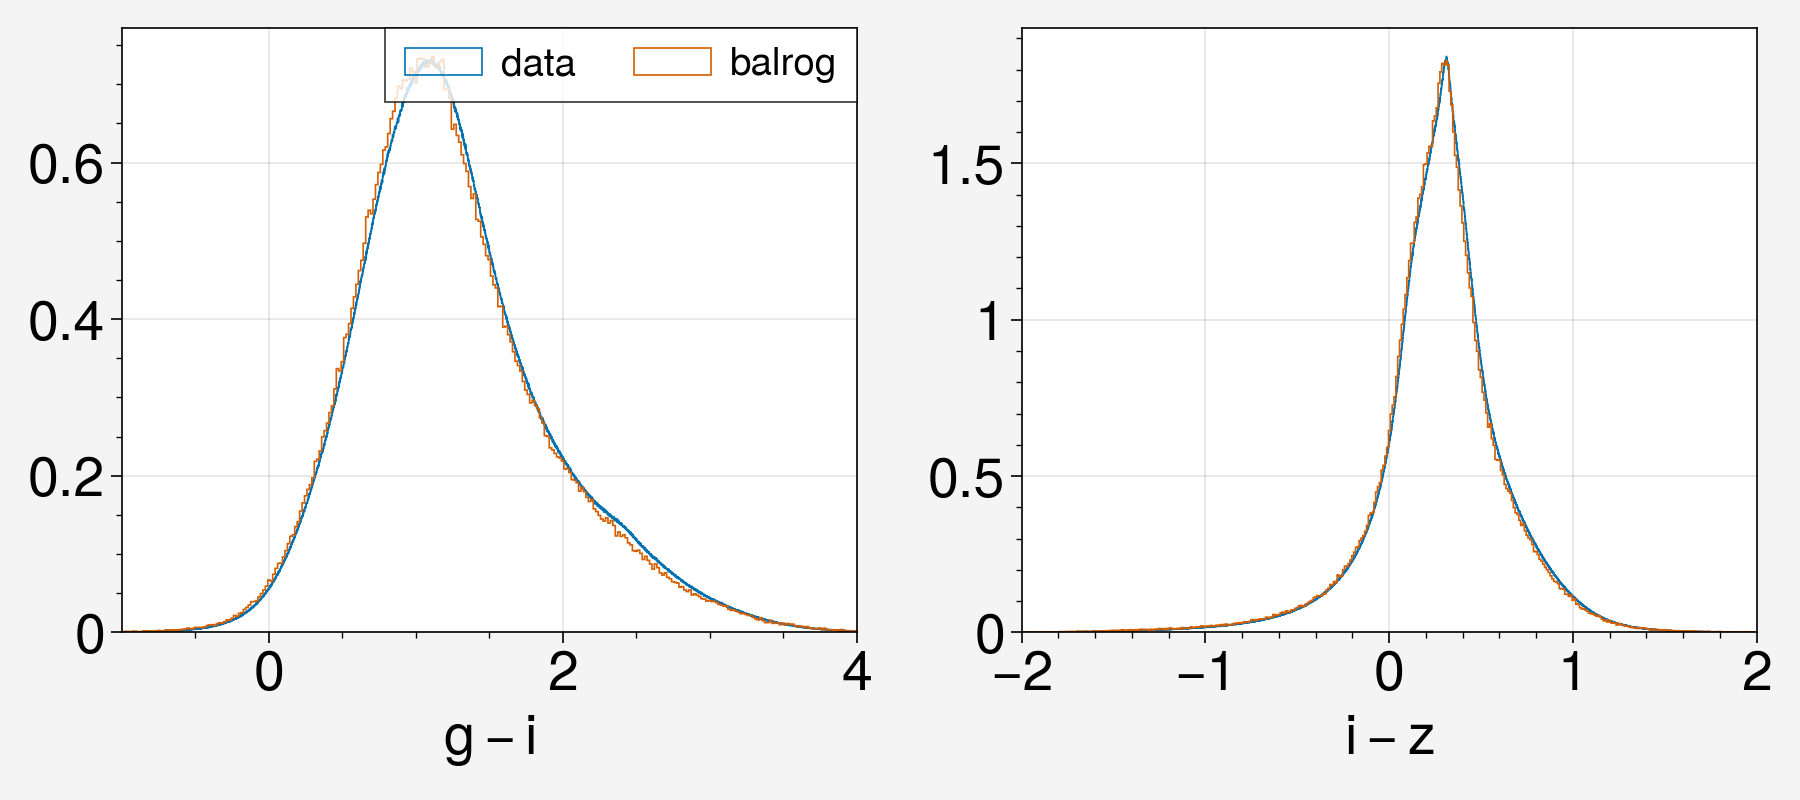

In [11]:
matplotlib.rcParams.update({'font.size': 20, 'legend.fontsize':'x-small'})
fig,ax=pplt.subplots(nrows=1, ncols=2, figsize=(9,4), sharex=False, sharey=False)
ax[0].hist(gmi, bins=10000, histtype='step', density=True, label='data')
ax[0].hist(mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_g'], 0) - mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_i'], 2), bins=1000, histtype='step', density=True, label='balrog')
ax[0].set_xlabel('$g-i$')
ax[0].set_xlim(-1, 4)
ax[0].legend()

ax[1].hist(imz, bins=10000, histtype='step', density=True, label='data')
ax[1].hist(mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_i'], 2) - mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_z'], 3), bins=1000, histtype='step', density=True, label='balrog')
ax[1].set_xlim(-2, 2)
ax[1].set_xlabel('$i-z$')

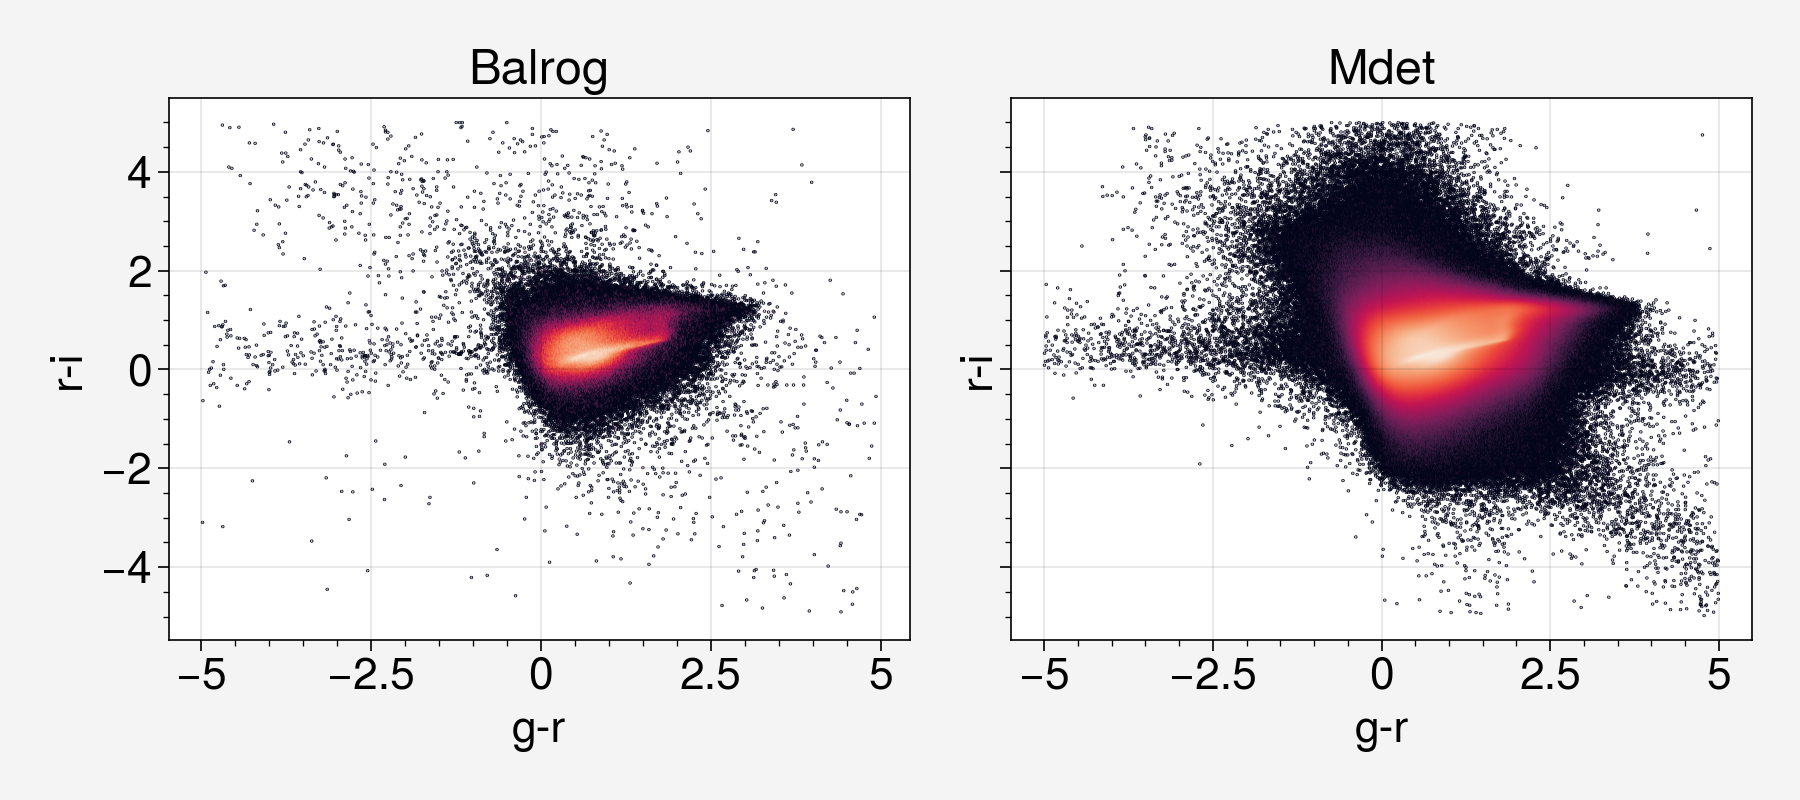

In [26]:
matplotlib.rcParams.update({'font.size': 16, 'legend.fontsize':'x-small'})
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharex=False, sharey=True)
gmr_bal = mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_g'], 0) - mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_r'], 1)
rmi_bal = mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_r'], 1) - mdet._compute_asinh_mags(d_noshear['meas_pgauss_band_flux_i'], 2)
ax[0].hexbin(gmr_bal,rmi_bal,bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001)
ax[0].set_xlabel('g-r')
ax[0].set_ylabel('r-i')
ax[0].set_title('Balrog')

ax[1].hexbin(gmr, rmi, bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001)
ax[1].set_xlabel('g-r')
ax[1].set_ylabel('r-i')
ax[1].set_title('Mdet')

plt.tight_layout()

In [28]:
idx = np.random.choice(np.arange(len(gmr)), size=len(d_noshear), replace=False)
tmpgmr = gmr[idx]
tmprmi = rmi[idx]

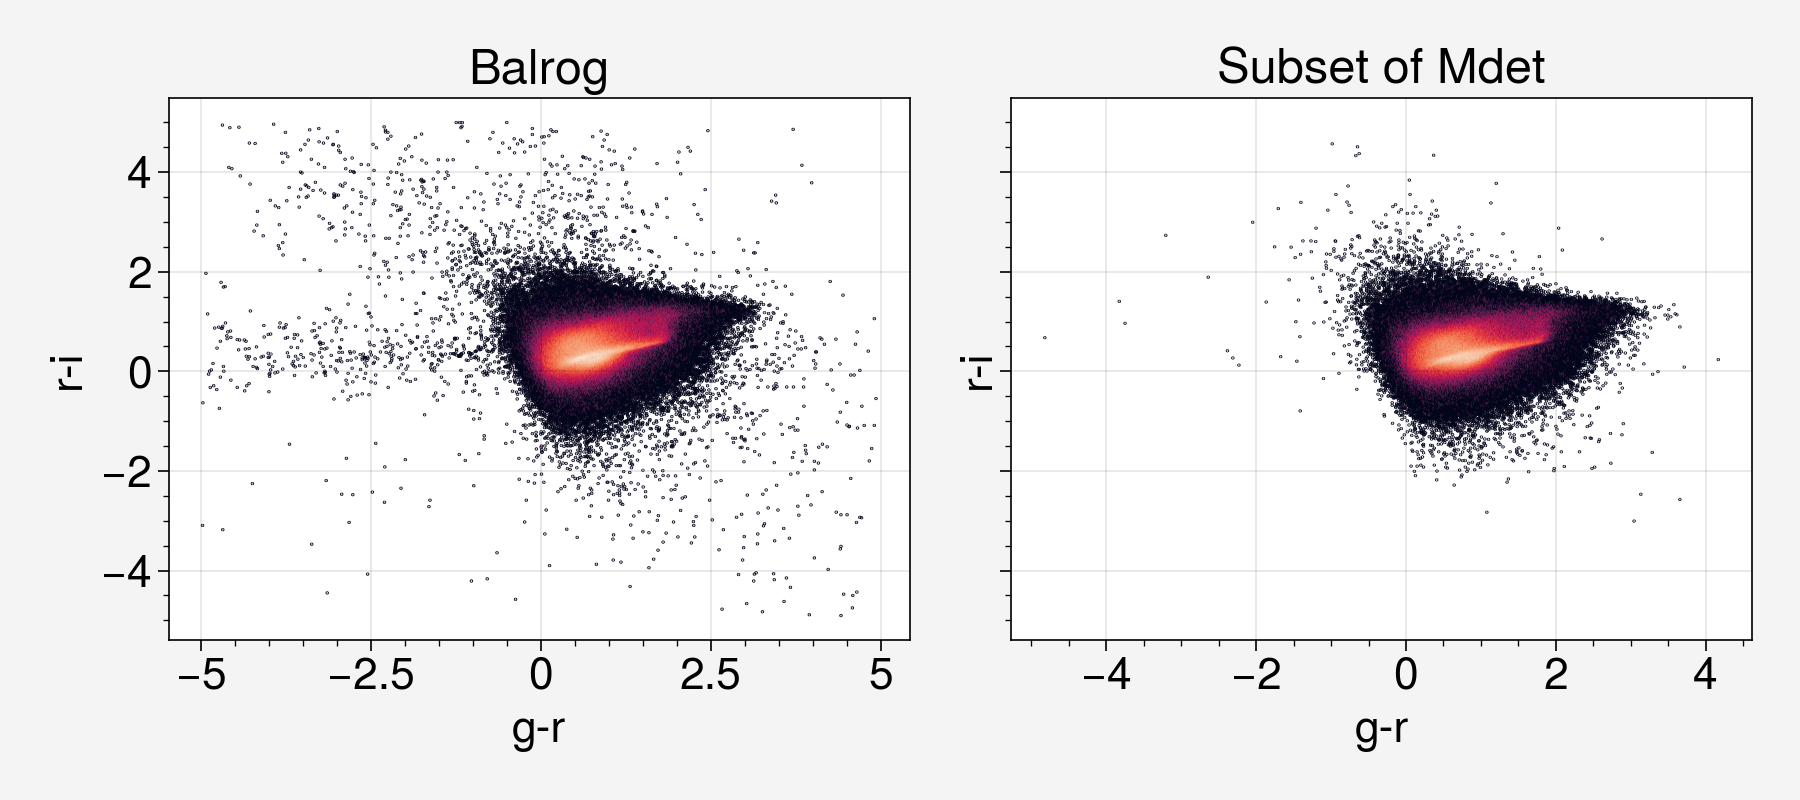

In [29]:
matplotlib.rcParams.update({'font.size': 16, 'legend.fontsize':'x-small'})
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharex=False, sharey=True)

ax[0].hexbin(gmr_bal,rmi_bal,bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001)
ax[0].set_xlabel('g-r')
ax[0].set_ylabel('r-i')
ax[0].set_title('Balrog')

ax[1].hexbin(tmpgmr, tmprmi, bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001)
ax[1].set_xlabel('g-r')
ax[1].set_ylabel('r-i')
ax[1].set_title('Subset of Mdet')

plt.tight_layout()

## 3. null tests (shapes vs psf quantities, )

### 3.1 S/N and size ratio

In [12]:
from math import log10
def assign_loggrid(x, y, xmin, xmax, xsteps, ymin, ymax, ysteps):
    # return x and y indices of data (x,y) on a log-spaced grid that runs from [xy]min to [xy]max in [xy]steps

    logstepx = log10(xmax/xmin)/xsteps
    logstepy = log10(ymax/ymin)/ysteps

    indexx = (np.log10(x/xmin)/logstepx).astype(int)
    indexy = (np.log10(y/ymin)/logstepy).astype(int)

    indexx = np.maximum(indexx,0)
    indexx = np.minimum(indexx, xsteps-1)
    indexy = np.maximum(indexy,0)
    indexy = np.minimum(indexy, ysteps-1)

    return indexx,indexy

def apply_loggrid(x, y, grid, xmin=0, xmax=0, xsteps=0, ymin=0, ymax=0, ysteps=0):
    indexx,indexy = assign_loggrid(x, y, xmin, xmax, xsteps, ymin, ymax, ysteps)
    res = np.zeros(len(x))
    res = grid[indexx,indexy]
    return res

def logmeshplot(data, xedges, yedges, label="quantity"):
    fig=plt.figure(figsize=(6,6))
    ax = plt.subplot(111)
    X, Y = np.meshgrid(yedges, xedges)
    plt.pcolormesh(X, Y, data)
    plt.xscale('log')
    plt.yscale('log')
    plt.colorbar(label=label)
    plt.ylabel("mcal snr")
    plt.xlabel("mcal size/psf_size")

    plt.minorticks_off() 
    ax.set_xticks(np.array([0.6,0.7,0.8,0.9,1.,2.,3.,4.,]))
    ax.set_xticklabels(np.array([r'5 x $10^{-1}$','','','',r'$10^{0}$',r'2 x $10^{0}$','',r'4 x $10^{0}$']))

def mesh_average(m, quantity,indexx,indexy,steps,count):
    m = np.zeros((steps,steps)) # revised version, was -1 before
    np.add.at(m,(indexx,indexy),quantity)
    m /= count
    return m

def find_assign_grid(d, mdet_step, mdet_mom, snmin, snmax, steps, sizemin, sizemax):

    mastercat_snr = d[mdet_step][mdet_mom+'_s2n']
    mastercat_Tr = d[mdet_step][mdet_mom+'_T_ratio']
    new_indexx,new_indexy = assign_loggrid(mastercat_snr, mastercat_Tr, snmin, snmax, steps, sizemin, sizemax, steps)

    return new_indexx, new_indexy

def find_bincount_2d(indexx, indexy, steps):

    from collections import Counter
    index_tup = [(i,j) for i,j in zip(indexx, indexy)]
    count = Counter(index_tup)
    all_count = np.zeros((steps, steps))
    for i in range(steps):
        for j in range(steps):
            if count[(i,j)] != 0:
                all_count[i,j] = count[(i,j)]

    return all_count

def accumulate_shear_per_tile(res, d, mdet_mom, snmin, snmax, steps, sizemin, sizemax):

    g1p_indexx, g1p_indexy = find_assign_grid(d, '1p', mdet_mom, snmin, snmax, steps, sizemin, sizemax)
    g1p_count = find_bincount_2d(g1p_indexx, g1p_indexy, steps)
    g1m_indexx, g1m_indexy = find_assign_grid(d, '1m', mdet_mom, snmin, snmax, steps, sizemin, sizemax)
    g1m_count = find_bincount_2d(g1m_indexx, g1m_indexy, steps)
    g2p_indexx, g2p_indexy = find_assign_grid(d, '2p', mdet_mom, snmin, snmax, steps, sizemin, sizemax)
    g2p_count = find_bincount_2d(g2p_indexx, g2p_indexy, steps)
    g2m_indexx, g2m_indexy = find_assign_grid(d, '2m', mdet_mom, snmin, snmax, steps, sizemin, sizemax)
    g2m_count = find_bincount_2d(g2m_indexx, g2m_indexy, steps)

    np.add.at(res['g_1p'], (g1p_indexx, g1p_indexy), d['1p'][mdet_mom+'_g_1'])
    np.add.at(res['g_1m'], (g1m_indexx, g1m_indexy), d['1m'][mdet_mom+'_g_1'])
    np.add.at(res['g_2p'], (g2p_indexx, g2p_indexy), d['2p'][mdet_mom+'_g_2'])
    np.add.at(res['g_2m'], (g2m_indexx, g2m_indexy), d['2m'][mdet_mom+'_g_2'])

    np.add.at(res['g1p_count'], (), g1p_count)
    np.add.at(res['g1m_count'], (), g1m_count)
    np.add.at(res['g2p_count'], (), g2p_count)
    np.add.at(res['g2m_count'], (), g2m_count)

    return res

def compute_mesh_response(res):

    g_1p = res['g_1p']/res['g1p_count']
    g_1m = res['g_1m']/res['g1m_count']
    g_2p = res['g_2p']/res['g2p_count']
    g_2m = res['g_2m']/res['g2m_count']

    R11 = (g_1p - g_1m)/0.02
    R22 = (g_2p - g_2m)/0.02
    new_response = (R11+R22)/2

    return new_response

In [13]:
steps = 20
snmin = 10
snmax = 1000
sizemin = 0.5
sizemax = 5.0
mdet_mom = 'meas_gauss'

In [14]:
count_all = np.zeros((steps,steps))
m = np.zeros((steps, steps))

res = {'g_1p': np.zeros((steps, steps)),
       'g_1m': np.zeros((steps, steps)),
       'g_2p': np.zeros((steps, steps)),
       'g_2m': np.zeros((steps, steps)),
       'g1p_count': np.zeros((steps, steps)),
       'g1m_count': np.zeros((steps, steps)),
       'g2p_count': np.zeros((steps, steps)),
       'g2m_count': np.zeros((steps, steps))}

# Accumulate raw sums of shear and mean shear corrected with response per tile. 
total_count = 0
total_count += len(d_noshear['ra'])

mastercat_noshear_snr = d_noshear[mdet_mom+'_s2n']
mastercat_noshear_Tr = d_noshear[mdet_mom+'_T_ratio']
new_e1 = d_noshear[mdet_mom+'_g_1']
new_e2 = d_noshear[mdet_mom+'_g_2']

# Need raw sums of shear for shear response. 
d = {'noshear': d_noshear, '1m': d_1m, '1p': d_1p, '2m': d_2m, '2p': d_2p}
res = accumulate_shear_per_tile(res, d, mdet_mom, snmin, snmax, steps, sizemin, sizemax)
new_indexx,new_indexy = assign_loggrid(mastercat_noshear_snr, mastercat_noshear_Tr, snmin, snmax, steps, sizemin, sizemax, steps)
new_count = np.zeros((steps, steps))
np.add.at(new_count,(new_indexx,new_indexy), 1)
np.add.at(count_all,(), new_count)
np.add.at(m,(new_indexx,new_indexy), (new_e1**2+new_e2**2)/2) # RMS of shear isn't corrected for the response. 
# new_meanes = mesh_average(new_means, np.sqrt((new_e1**2+new_e2**2)/2),new_indexx,new_indexy,steps,new_count)

H, xedges, yedges = np.histogram2d(mastercat_noshear_snr, mastercat_noshear_Tr, bins=[np.logspace(log10(snmin),log10(snmax),steps+1), np.logspace(log10(sizemin),log10(sizemax),steps+1)])
new_response = compute_mesh_response(res)
new_meanes = np.sqrt(m/count_all)
new_shearweight = (new_response/new_meanes)**2

res = {'xedges': xedges, 'yedges': yedges, 'count': count_all, 'meanes': new_meanes, 'response': new_response, 'weight': new_shearweight}

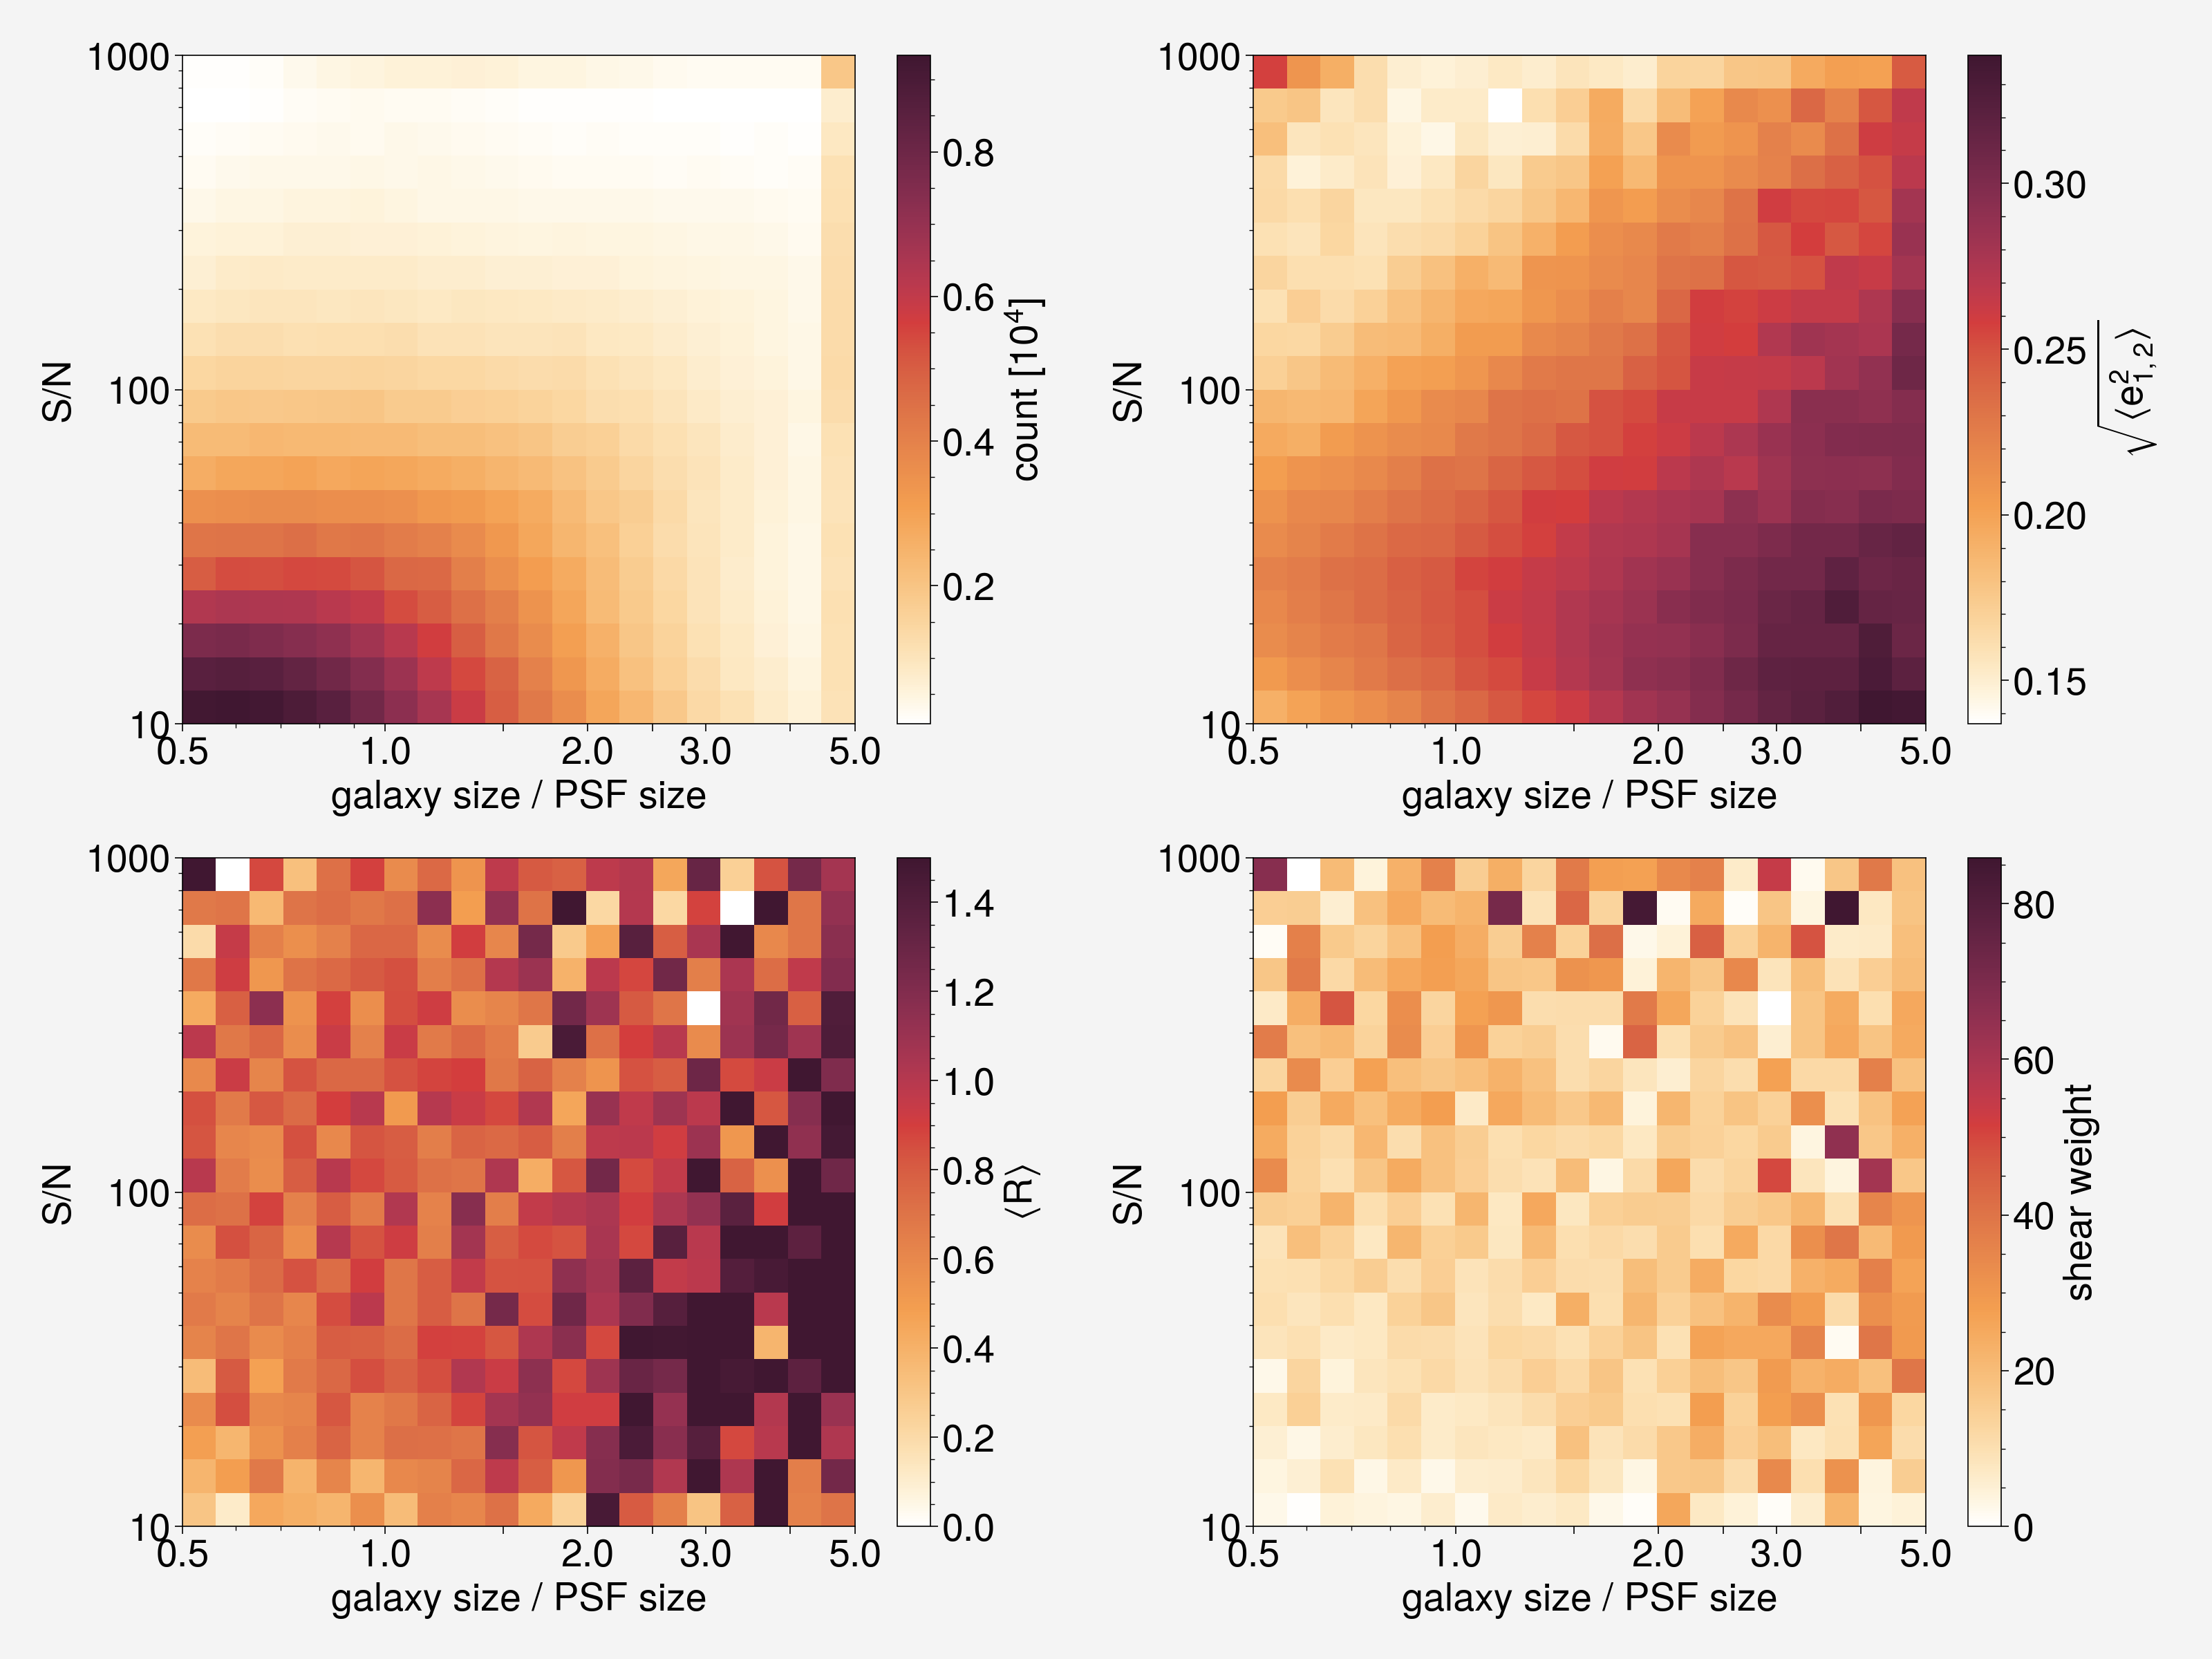

In [15]:
xedges = res['xedges']
yedges = res['yedges']
count_all = res['count']
new_meanes = res['meanes']
new_response = res['response']
new_shearweight = res['weight']

matplotlib.rcParams.update({'font.size': 20, 'legend.fontsize':'x-small'})
fig=plt.figure(figsize=(16,12))
ax = plt.subplot(221)
X, Y = np.meshgrid(yedges, xedges)
im = ax.pcolormesh(X, Y, count_all/1e4)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("S/N")
plt.xlabel("galaxy size / PSF size")
#im.colorbar(label="count")
# im.axes.get_xaxis().set_visible(True)
fig.colorbar(im, ax=ax, label=r"count [$10^4$]")
# ax.set_xticks(np.array([1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.]))
ax.set_xticks(np.array([0.5,1.0,1.5,2.0,2.5,3.,4.,5.]))
# ax.set_xticklabels(np.array(['', r'1.3','',r'1.5','',r'1.7','', '',r'2.0']))
ax.set_xticklabels(np.array(['0.5', r'1.0','',r'2.0','',r'3.0','', '5.0']))

# Eq 9. 
ax = plt.subplot(222)
X, Y = np.meshgrid(yedges, xedges)
im = ax.pcolormesh(X, Y, new_meanes, )
plt.xscale('log')
plt.yscale('log')
plt.ylabel("S/N")
plt.xlabel("galaxy size / PSF size")
# im.axes.get_xaxis().set_visible(True)
fig.colorbar(im, ax=ax, label=r"$\sqrt{\langle e_{1,2}^2\rangle}$")
# ax.set_xticks(np.array([1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.]))
ax.set_xticks(np.array([0.5,1.0,1.5,2.0,2.5,3.,4.,5.]))
# ax.set_xticklabels(np.array(['', r'1.3','',r'1.5','',r'1.7','', '',r'2.0']))
ax.set_xticklabels(np.array(['0.5', r'1.0','',r'2.0','',r'3.0','', '5.0']))

ax = plt.subplot(223)
X, Y = np.meshgrid(yedges, xedges)
im = ax.pcolormesh(X, Y, new_response, vmin=0.0, vmax=1.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("S/N")
plt.xlabel("galaxy size / PSF size")
# im.axes.get_xaxis().set_visible(True)
fig.colorbar(im, ax=ax, label=r"$\langle$R$\rangle$")
# ax.set_xticks(np.array([1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.]))
ax.set_xticks(np.array([0.5,1.0,1.5,2.0,2.5,3.,4.,5.]))
# ax.set_xticklabels(np.array(['', r'1.3','',r'1.5','',r'1.7','', '',r'2.0']))
ax.set_xticklabels(np.array(['0.5', r'1.0','',r'2.0','',r'3.0','', '5.0']))

ax = plt.subplot(224)
X, Y = np.meshgrid(yedges, xedges)
im = ax.pcolormesh(X, Y, new_shearweight, vmin=0)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("S/N")
plt.xlabel("galaxy size / PSF size")
# im.axes.get_xaxis().get_ticklabels()[3].set_visible(False)
fig.colorbar(im, ax=ax, label="shear weight")

#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.minorticks_off() 
# ax.set_xticks(np.array([1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.]))
ax.set_xticks(np.array([0.5,1.0,1.5,2.0,2.5,3.,4.,5.]))
# ax.set_xticklabels(np.array(['', r'1.3','',r'1.5','',r'1.7','', '',r'2.0']))
ax.set_xticklabels(np.array(['0.5', r'1.0','',r'2.0','',r'3.0','', '5.0']))
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

### 3.2 Get shear response

In [16]:
g_1p = np.average(d_1p[mdet_mom+'_g_1'])
g_1m = np.average(d_1m[mdet_mom+'_g_1'])
g_2p = np.average(d_2p[mdet_mom+'_g_2'])
g_2m = np.average(d_2m[mdet_mom+'_g_2'])

R11 = (g_1p - g_1m)/0.02
R22 = (g_2p - g_2m)/0.02
R = (R11+R22)/2
print(R)

0.7818681098184448


### 3.3 Size ratio vs S/N

In [11]:
d_bal_raw = fio.read('/global/cfs/cdirs/des/y6-balrog/balrog_cats_Y6/masaSpecial/matched_measured_cat_Y6_NERSC_metadetect_masaSpecial_noshear.fits')
d_bal_raw = d_bal_raw[d_bal_raw['weight_scheme'] == 'Y3_weight']
d_mdet = fio.read('/global/cfs/cdirs/des/y6-shear-catalogs/Y6A2_METADETECT_V5b/jackknife_patches_blinded/patch-0000.fits')

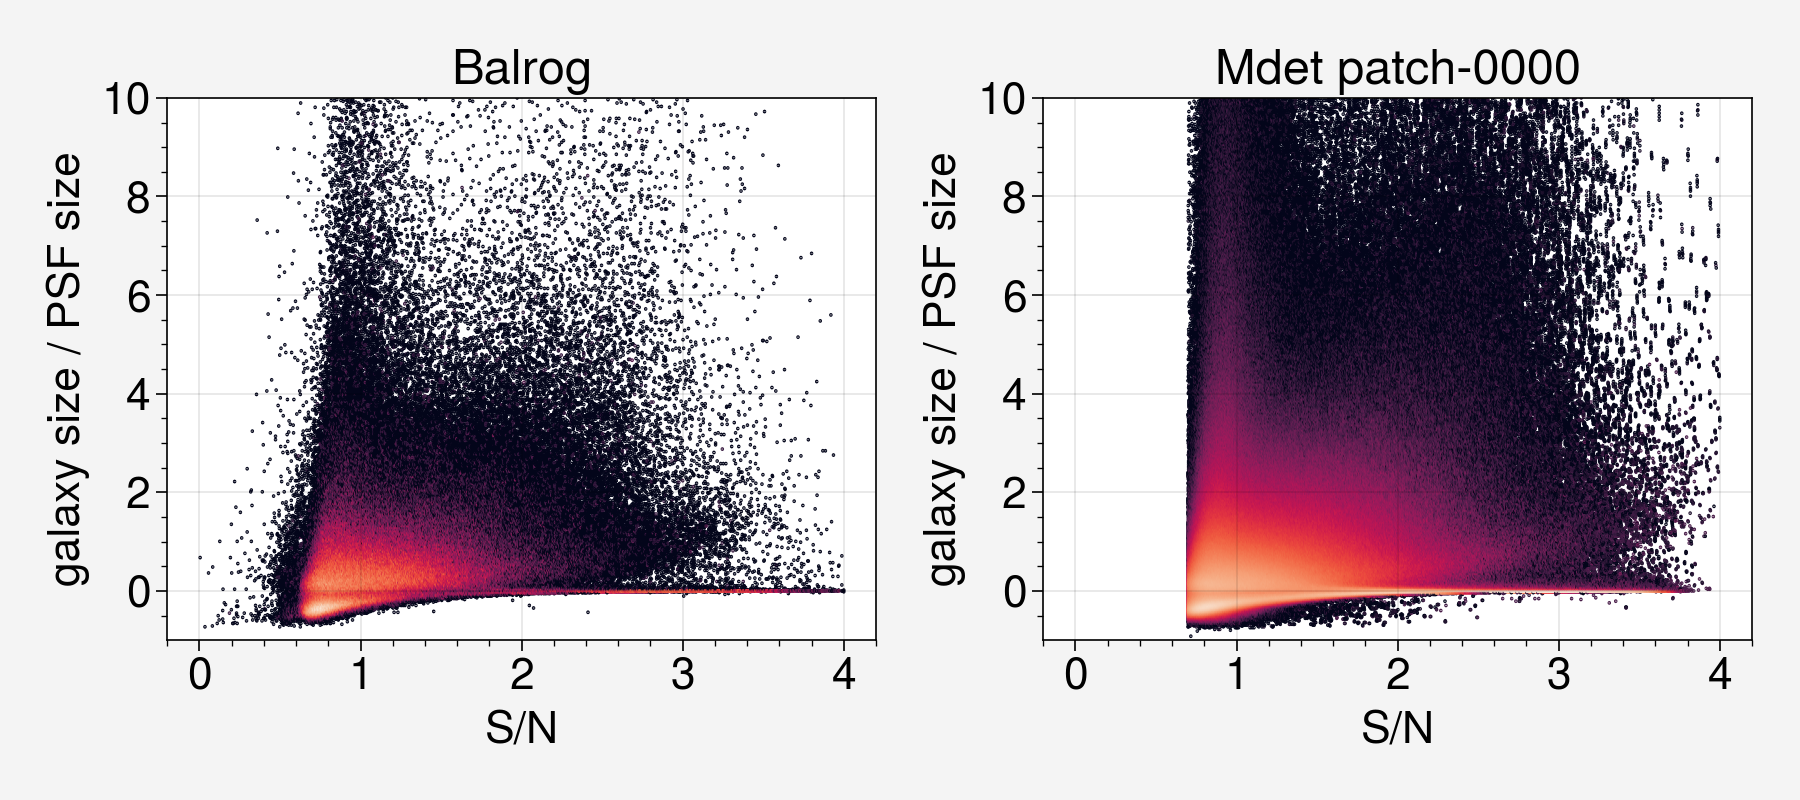

In [13]:
matplotlib.rcParams.update({'font.size': 16, 'legend.fontsize':'x-small'})
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
ax[0].hexbin(np.log10(d_bal_raw['meas_gauss_s2n']), d_bal_raw['meas_gauss_T_ratio'], bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001, extent=(0, 4, -10, 10))
ax[0].set_ylim(-1, 10)
ax[0].set_xlabel('S/N')
ax[0].set_ylabel('galaxy size / PSF size')
ax[0].set_title('Balrog')

ax[1].hexbin(np.log10(d_mdet['gauss_s2n']), d_mdet['gauss_T_ratio'], bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001, extent=(0, 4, -10, 10))
ax[1].set_ylim(-1, 10)
ax[1].set_xlabel('S/N')
ax[1].set_ylabel('galaxy size / PSF size')
ax[1].set_title('Mdet patch-0000')
plt.tight_layout()

In [10]:
idx = np.random.choice(np.arange(len(s2n_y6)), size=len(d_noshear), replace=False)
tmps2n = s2n_y6[idx]
tmpsizer = sizer_y6[idx]

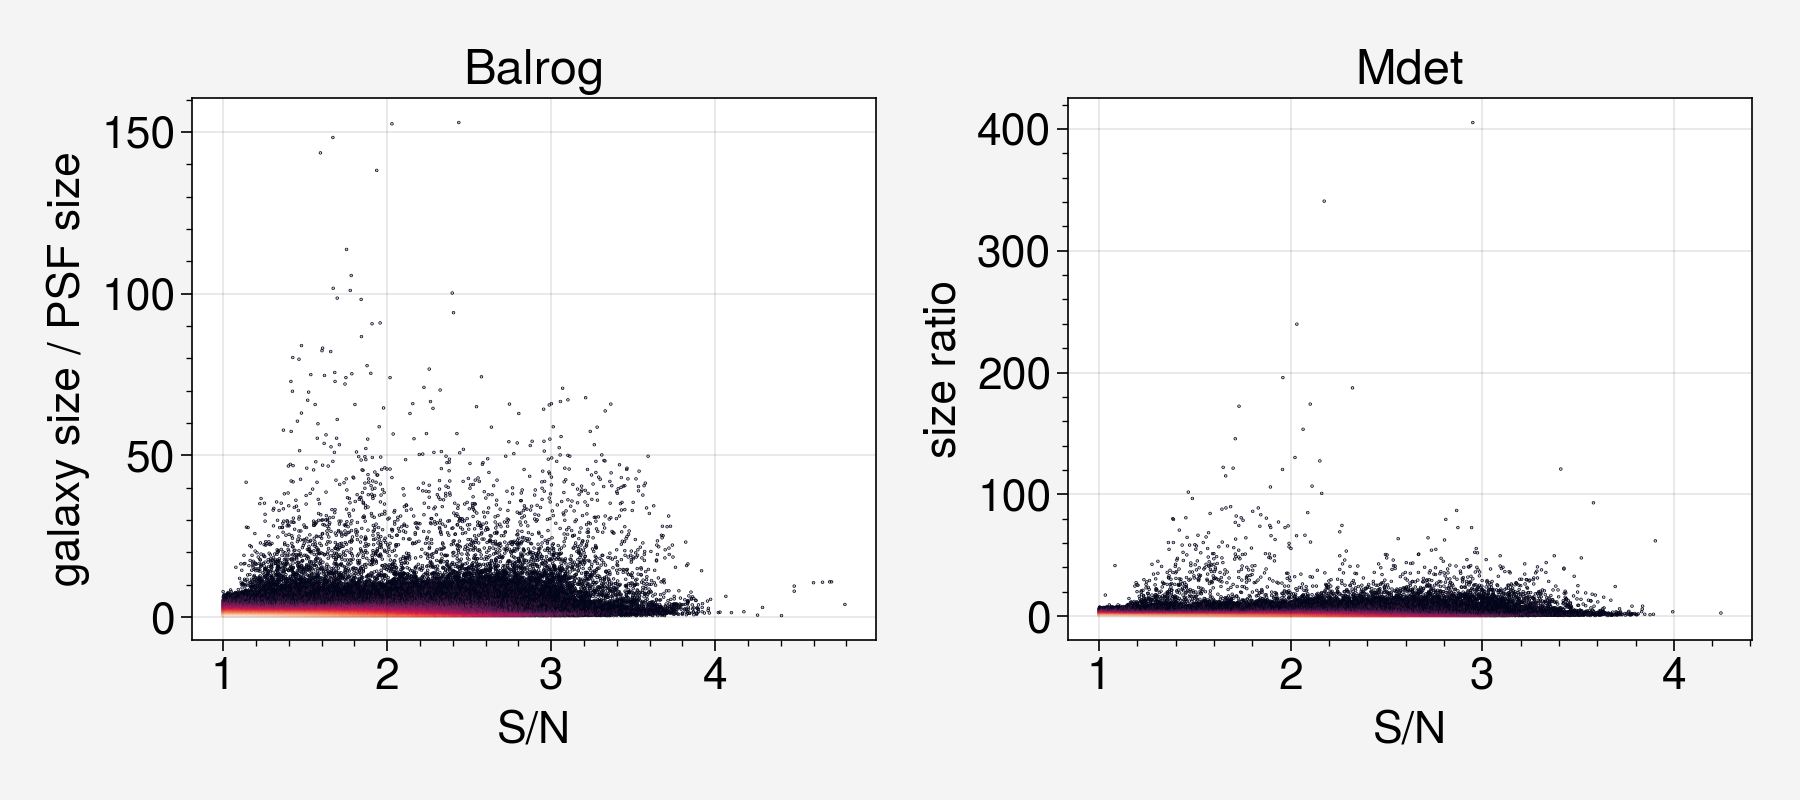

In [11]:
matplotlib.rcParams.update({'font.size': 16, 'legend.fontsize':'x-small'})
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharex=False, sharey=False)
ax[0].hexbin(np.log10(d_noshear['meas_gauss_s2n']), d_noshear['meas_gauss_T_ratio'], bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001)
# ax[0].set_ylim(-0.5, 25)
ax[0].set_xlabel('S/N')
ax[0].set_ylabel('galaxy size / PSF size')
ax[0].set_title('Balrog')

ax[1].hexbin(np.log10(tmps2n), tmpsizer, bins='log', cmap='rocket', gridsize=1000, mincnt=0.00001)
# ax[1].set_ylim(-0.5, 25)
ax[1].set_xlabel('S/N')
ax[1].set_ylabel('size ratio')
ax[1].set_title('Mdet')

plt.tight_layout()

### 3.4 Shear as a function of PSF quantities

In [5]:
import pickle
with open('/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b_paper/mean_shear_measurement/mean_shear_bin_final_v5_weighted.pickle', 'rb') as f:
    dbin = pickle.load(f)
print(dbin.keys(), dbin['psfrec_g_1'].keys())

dict_keys(['psfrec_g_1', 'psfrec_g_2', 'psfrec_T', 'gauss_s2n', 'gauss_T', 'gauss_T_ratio', 'pgauss_T', 'gmi']) dict_keys(['sort_index', 'min', 'max', 'wsort', 'low', 'high', 'hist', 'rev', 'nperbin', 'mean', 'std', 'err', 'median'])


In [17]:
binnum = len(dbin['psfrec_g_1']['mean'])
res = {'noshear': np.zeros((binnum, 2)), 'num_noshear': np.zeros((binnum, 2)), 
        '1p': np.zeros((binnum, 2)), 'num_1p': np.zeros((binnum, 2)), 
        '1m': np.zeros((binnum, 2)), 'num_1m': np.zeros((binnum, 2)),
        '2p': np.zeros((binnum, 2)), 'num_2p': np.zeros((binnum, 2)),
        '2m': np.zeros((binnum, 2)), 'num_2m': np.zeros((binnum, 2))}
d_balrog = {'noshear':d_noshear, '1p':d_1p, '1m':d_1m, '2p':d_2p, '2m':d_2m}
res_shear_psf = {'psfrec_g_1': res, 'psfrec_g_2': res}
for key in res_shear_psf.keys():
    for step in ['noshear', '1p', '1m', '2p', '2m']:
        for b in range(binnum):
            msk = ((d_balrog[step]['meas_'+key] >= dbin[key]['low'][b]) & (d_balrog[step]['meas_'+key] < dbin[key]['high'][b]))

            np.add.at(
                res_shear_psf[key][step], 
                (b, 0), 
                np.sum(d_balrog[step]['meas_gauss_g_1'][msk]),
            )
            np.add.at(
                res_shear_psf[key][step], 
                (b, 1), 
                np.sum(d_balrog[step]['meas_gauss_g_2'][msk]),
            )
            np.add.at(
                res_shear_psf[key]["num_" + step], 
                (b, 0), 
                len(d_balrog[step]['meas_gauss_g_1'][msk]),
            )
            np.add.at(
                res_shear_psf[key]["num_" + step], 
                (b, 1), 
                len(d_balrog[step]['meas_gauss_g_2'][msk]),
            )

g1g2 = np.zeros((binnum, 2))
d_shear_psf = {'psfrec_g_1': g1g2, 'psfrec_g_2': g1g2,}
for key in d_shear_psf.keys():
    for b in range(binnum):
        g1 = res_shear_psf[key]['noshear'][b][0] / res_shear_psf[key]['num_noshear'][b][0]
        g1p = res_shear_psf[key]['1p'][b][0] / res_shear_psf[key]['num_1p'][b][0]
        g1m = res_shear_psf[key]['1m'][b][0] / res_shear_psf[key]['num_1m'][b][0]
        R11 = (g1p - g1m) / 2 / 0.01

        g2 = res_shear_psf[key]['noshear'][b][1] / res_shear_psf[key]['num_noshear'][b][1]
        g2p = res_shear_psf[key]['2p'][b][1] / res_shear_psf[key]['num_2p'][b][1]
        g2m = res_shear_psf[key]['2m'][b][1] / res_shear_psf[key]['num_2m'][b][1]
        R22 = (g2p - g2m) / 2 / 0.01

        d_shear_psf[key][b, 0] = g1/R11
        d_shear_psf[key][b, 1] = g2/R22

In [18]:
with open('/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b_paper/mean_shear_measurement/mean_shear_measurement_final_v5_mpi.pickle', 'rb') as f:
    d_mean_shear = pickle.load(f)
mean_e1 = 0.00020496 # 0.00016667134
mean_e2 = -0.00003086 # -2.50947e-05

In [19]:
binnum

25

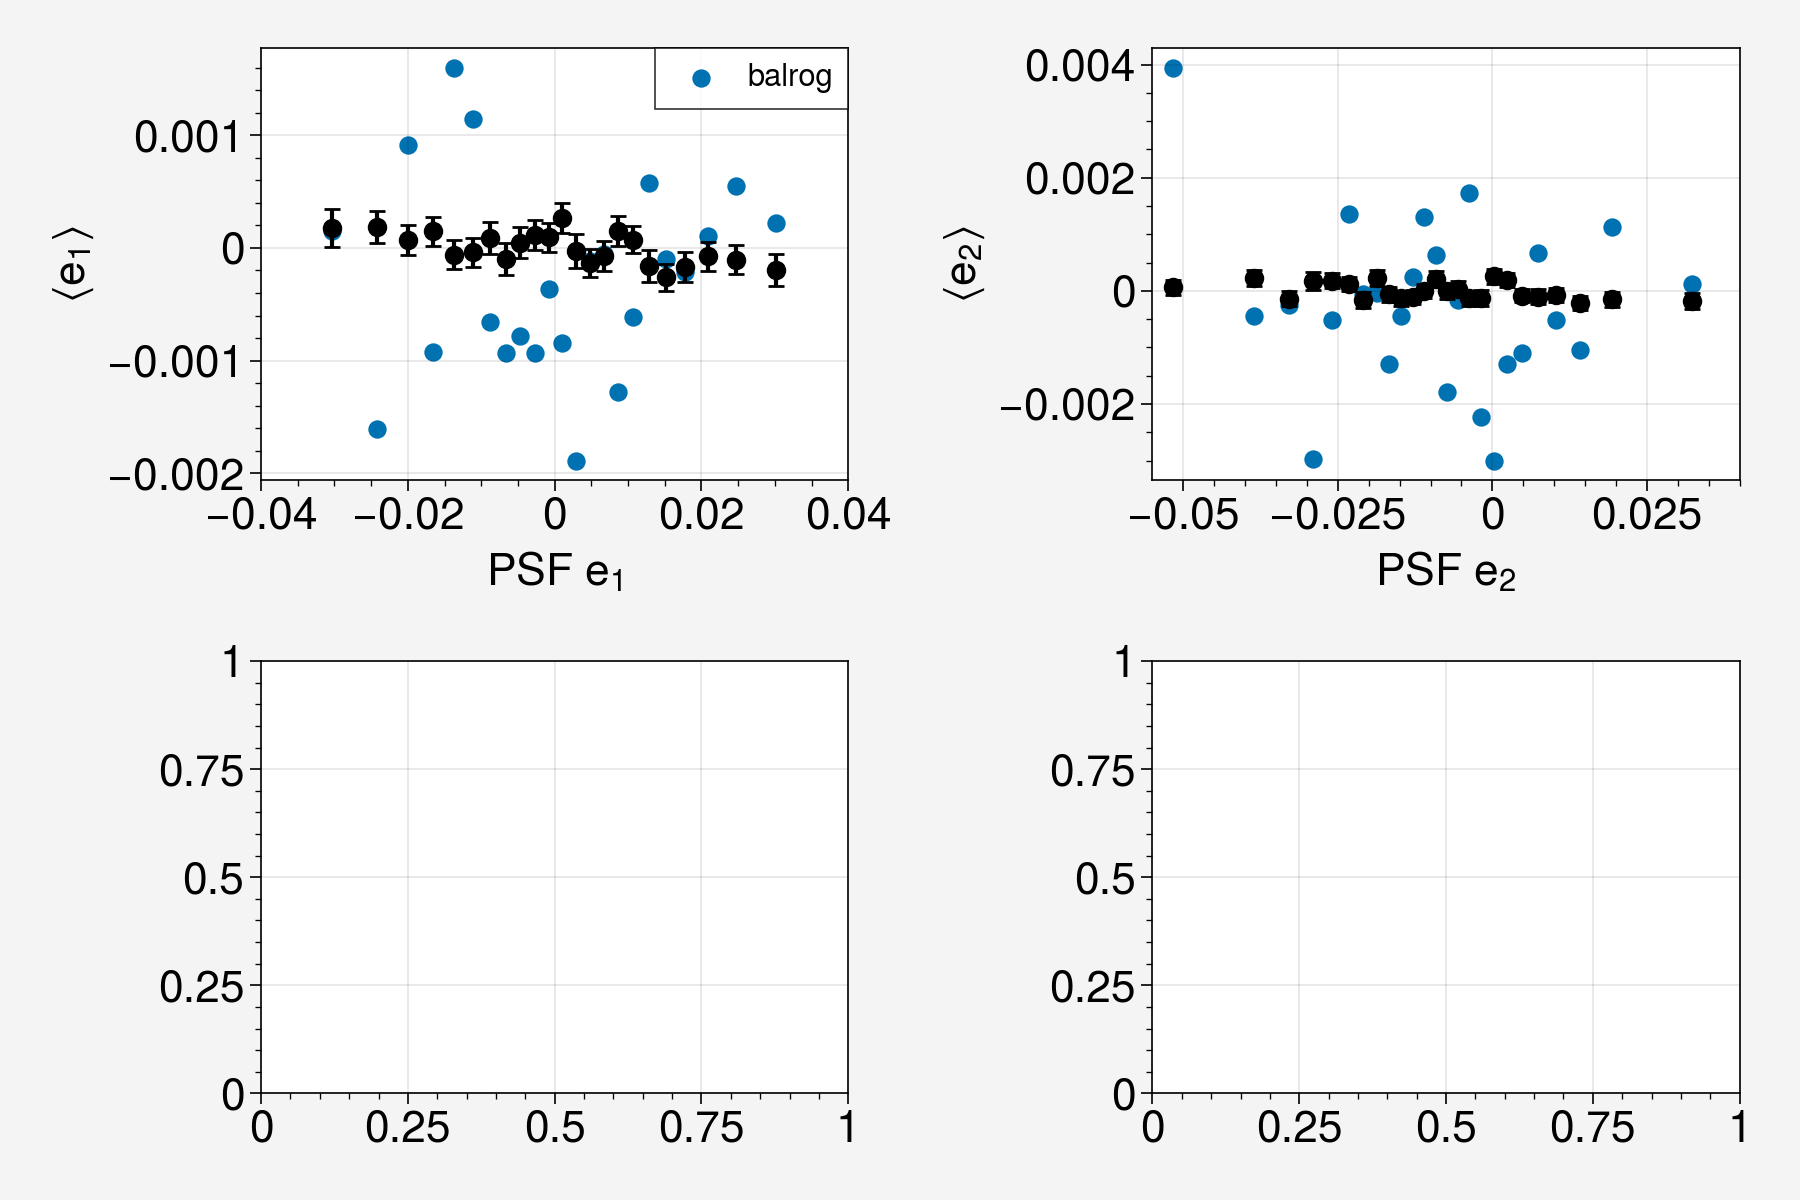

In [22]:
matplotlib.rcParams.update({'font.size': 16, 'legend.fontsize':'x-small', 'lines.markersize': 6})
layout = np.arange(4).reshape(2, 2)
fig,ax = plt.subplot_mosaic(layout, figsize=(9,6))


ax[0].errorbar(d_mean_shear['psfrec_g_1']['bin_mean'], d_mean_shear['psfrec_g_1']['g1']-mean_e1, yerr=d_mean_shear['psfrec_g_1']['g1_cov'], fmt='o', c='k', ls='none')
ax[0].scatter(d_mean_shear['psfrec_g_1']['bin_mean'], d_shear_psf['psfrec_g_1'][:,0], label='balrog')
ax[0].set_xlabel(r'PSF $e_1$')
ax[0].set_ylabel(r'$\langle e_1 \rangle$')
ax[0].set_xlim(-0.04, 0.04)
# ax[0].set_ylim(-0.00055, 0.0007)
ax[0].legend()

ax[1].errorbar(d_mean_shear['psfrec_g_2']['bin_mean'], d_mean_shear['psfrec_g_2']['g2']-mean_e2, yerr=d_mean_shear['psfrec_g_2']['g2_cov'], fmt='o', c='k', ls='none')
ax[1].scatter(d_mean_shear['psfrec_g_2']['bin_mean'], d_shear_psf['psfrec_g_2'][:,1], label='balrog')
ax[1].set_xlabel(r'PSF $e_2$')
ax[1].set_ylabel(r'$\langle e_2 \rangle$')
ax[1].set_xlim(-0.055, 0.04)
# ax[1].set_ylim(-0.00055, 0.0007)


# ax[2].errorbar(d['psfrec_T']['bin_mean'], d['psfrec_T']['g1']-mean_e1, yerr=d['psfrec_T']['g1_cov'], fmt='o', c='k', ls='none')
# x,reg,text1,text2,posx,posy = generate_annot_text(d, 'psfrec_T', 'g1', mean_e1)
# ax[2].plot(d['psfrec_T']['bin_mean'], reg_e1_T, ls='--', alpha=0.7, c='r')
# ax[2].plot(x, reg, c='k')
# # ax[2].text(posx, posy, text1+'\n'+text2, ha="center", va="center", size=15,)
# # ax[2].set_xscale('log')
# ax[2].set_xlabel(r'$T_{\rm PSF}$')
# ax[2].set_ylabel(r'$\langle e_1 \rangle$')
# ax[2].set_ylim(-0.0007,0.00075)


# ax[3].errorbar(d['psfrec_T']['bin_mean'], d['psfrec_T']['g2']-mean_e2, yerr=d['psfrec_T']['g2_cov'], fmt='o', c='k', ls='none')
# x,reg,text1,text2,posx,posy = generate_annot_text(d, 'psfrec_T', 'g2', mean_e2)
# ax[3].plot(d['psfrec_T']['bin_mean'], reg_e2_T, ls='--', alpha=0.7, c='r')
# ax[3].plot(x, reg, c='k')
# # ax[3].text(posx, posy, text1+'\n'+text2, ha="center", va="center", size=15,)
# # ax[3].set_xscale('log')
# ax[3].set_xlabel(r'$T_{\rm PSF}$')
# ax[3].set_ylabel(r'$\langle e_2 \rangle$')
# ax[3].set_ylim(-0.0007,0.00075)

plt.tight_layout()
# plt.savefig('/global/homes/m/myamamot/DES/des-y6-analysis/vf_figures/final_paper/mean_shear_stats_psfe1e2T.pdf', bbox_inches='tight')